# Decision Tree Classifier

## Introduction
---
**Supervised machine learning** tries to learn patterns in data to make predictions for new data. **Decision trees** are one algorithm for doing this. Fancier models exist, which give more accurate predictions, but decision trees are easy to understand, and they are the basic building block for some of the best models in data science. Through the guidance of this notebook, you will learn how to train and evaluate a decision tree and predict future data. 
 
Before we jump into using a dataset from the astronomical literature, let's start with the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to get a feel for how to build and evaluate a decision tree. If you are coming across this for the first time, you are highly encouraged to visit the hyperlink above and understand what this data represents. 

In [1]:
from sklearn.datasets import load_iris
#if above gives errors, open a terminal window and type: pip install sklearn

data = load_iris() #a preloaded dataset from sklearn
list(data.target_names) #different types of iris flowers

['setosa', 'versicolor', 'virginica']

In [2]:
#what is this? #how did i get the attribute .target_names above?
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Data Exploration
---
It's always a good idea to get to know your data. 
1. What is the dimension of your data? I.e., how many rows and columns does it have? 
2. What does each row represent? 
3. What does each column represent?
4. Each column represents a **feature**. What do these features mean? (hint: check our [syllabus](https://github.com/deerow22/STELLAR_interns/blob/master/Syllabus/Week_20.md))
5. How are different features related?
6. Do we have equal representation from each Iris type, or is there a bias? (hint: check [here](https://en.wikipedia.org/wiki/Iris_flower_data_set)) 

In [3]:
import numpy as np
import pandas as pd

#put data into pandas for ease of working with
iris = pd.DataFrame(data['data'], columns=data['feature_names'])

print(iris.head()) #returns the first 5 rows of df
print(iris.describe()) #summary statistics

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [4]:
#another way to visualize
from IPython.display import display
#if above gives errors open terminal and type: pip install IPython

display(iris.head())
display(iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#for question #1 you might want to write code in this cell
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


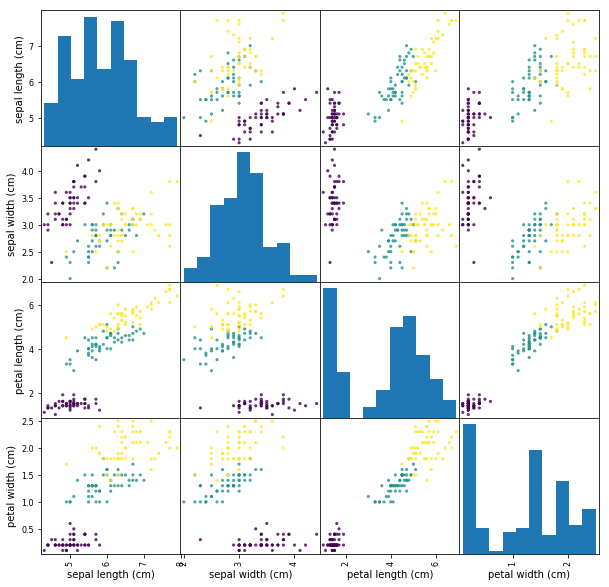

In [7]:
#visualizing as a corner plot
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(iris, c=data['target'],marker='o', s=10,alpha=.8,figsize=(10,10))
plt.show()

#### Correlation heatmap

Correlation is a good way to see the relationships among different pairs of variables. Here we use the fuction inside a DataFrame and visualize the result as heatmap using Seaborn package. 
- The range for correlation is -1 to 1, where -1 is completely negatively correlated, 0 is no correlation, and +1 is completely positively correlated.

_Want to know the type of correlation? Want to know what ".corr()" means? Want to know what a heapmap is in more detail? Use your Google skills generously :)_

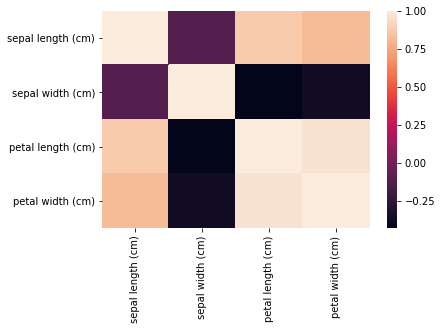

In [8]:
import seaborn as sns

corr = iris.corr()
sns.heatmap(corr)

# PAUSE 
## For [Slides](https://docs.google.com/presentation/d/1RiTfKWxTOJ_BGvKTSdcKBNndkEbiK9RznOXFUjCuG-A/edit?usp=sharing) 
---

## Building a decision tree model
---
Scikit-learn Decision Trees

Decision trees is a **supervised learning method** (meaning that there is a target feature we are trying to predict). It is a method used for classification (e.g., is a house above a certain value) and regression (e.g., how much does a house cost). The goal is to **create a model that predicts the value of a target feature by learning simple decision rules inferred from the other data features.**

We will use a decision tree algorithm from the popular **scikit-learn** machine learning libray (http://scikit-learn.org/stable/) to build a decision tree model. The library contains efficient tools with relatively simple interface for data mining and data analysis, and reusable in various contexts. Scikit-learn and Pandas (and Numpy if you continue to dabble in machine learning) are your best friends.

**DecisionTreeClassifier** is a class within scikit-learn that is capable of performing multi-class classification on a dataset. For example, it can classify a given data point of an Iris dataset into three different flowers. For more information: http://scikit-learn.org/stable/modules/tree.html

DecisionTreeClassifier takes 2 inputs: 
- a matrix X, of size [n_samples, n_features] holding the **training samples**, and 
- an array Y of integer values, size [n_samples], holding the **class labels** for the training samples

More documentation on DecisionTreeClassifier parameters can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
# Defining inputs

X = iris
y = data.target

In [ ]:
## Import the decision tree classifier from library (DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier


# Define your model here (one line of code)
model =

# Fit your model here (one line of code)
fit_model = 



#note: from documentation, "training input samples" are the features you want to build your model with
#and "target values" is the feature you want to predict 

#Hint: You do not need to code anything explicitly. Just use standard methods for this class.
#If you feel lost at any point, refer the documentation which has examples for using different methods you will need. 
#i.e. BIG HINT: use the "For more information:" url link above

### Using your model, predict the classifications for some flowers and reflect on those predictions

In [ ]:
#generate predictions from your model

predicted = 
print(predicted)

In [ ]:
#generate prediction probabilities from your model

probabilities = 
print(probabilities)

# Reflection 1
---

How do you feel about these predictions? Now use the Iris data in the Test Datasets folder to predict a classification for a new data point? How do you feel about this prediction? Take a few minutes to think about these questions. 

### Tree Visualization
-----------------

In [ ]:
from sklearn import tree
tree.plot_tree(model.fit(data.data, data.target)); 

#### Manually trace your new Iris datapoint through your decision tree. Did you get the same answer?

### How good is your model?
---
There are various metrics to test how good a model is, and one is accuracy. Conveniently scikit-learn includes built in functionality for this, as well as other metrics you could choose.

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Note: this is a bit of a cheat because we are using the **same data** to both build the tree, and then running that data through the tree to predict values. How could you improve this? 

Since we used the same data for training and predicting, would you expect the accuracy to be high? What does it mean when the accuracy is not 100%?



In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predicted)

## Training and testing the accuracy of your model
---
### Training set and test set

Above, we used the same data to build/train the model and calculate the accuracy of the model. In real life applications, say you had money in the game, why might that be bad? What might be a better way to test the accuracy of your model? 

Not use the same data to generate the model and then test the model accuracy.

The practical value of a model comes from making predictions on new data, so we should measure performance on data that wasn't used to build the model. The most straightforward way to do this is to **exclude some data** from the model-building process, and then **use the excluded data to test the accuracy of the model**. This excluded data is called validation/testing data.

We will split the dataset into a training set, to build the decision tree on, and a validation set. For the validation set, we pretend we don't know the price, predict the price using the decision tree built on the training set,  and then compare the predicted price to the true price to see how well we did.

Splitting data sets into a training set and a validation set is a very common operation in machine learning, so scikit-learn has nice funcationality for this operation

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection


In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 11)


#NOTICE: below are the same steps as before, except our data sample 
model = DecisionTreeClassifier()
#fit the model to the training set
fit_model = model.fit(train_X,train_y)
#compare predictions from this model to the test set
predicted = fit_model.predict(test_X)
accuracy_score(test_y, predicted)

### Rerun the cell above multiple times. What do you think is happening to the accuracy score?